In [1]:
%pylab inline

from styles import *
import os

Populating the interactive namespace from numpy and matplotlib


In [33]:
odir = os.path.expandvars("$HOME/Projects/J-PAS/j-pas_challenge/outs")

jpas_z0p21 = genfromtxt("{}/jpas-z0p21/dynbas_output.log".format(odir), dtype=None, names=True)
jpas_z0p50 = genfromtxt("{}/jpas-z0p50/dynbas_output.log".format(odir), dtype=None, names=True)
jpas_z0p90 = genfromtxt("{}/jpas-z0p90/dynbas_output.log".format(odir), dtype=None, names=True)

jplus_z0p21 = genfromtxt("{}/jplus-z0p21/dynbas_output.log".format(odir), dtype=None, names=True)
jplus_z0p50 = genfromtxt("{}/jplus-z0p50/dynbas_output.log".format(odir), dtype=None, names=True)
jplus_z0p90 = genfromtxt("{}/jplus-z0p90/dynbas_output.log".format(odir), dtype=None, names=True)


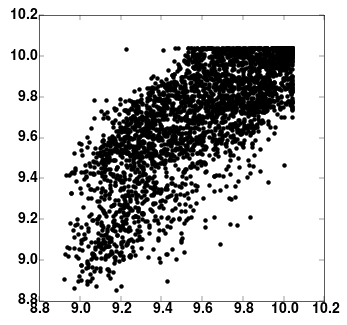

In [34]:
plot(jpas_z0p21["log_t_L_mod"], jplus_z0p21["log_t_L_mod"], ".k")
gca().set_aspect("equal")